In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set()
style.use('fivethirtyeight')
import warnings  
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost  import XGBClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from sklearn.neural_network import MLPClassifier
import pandas_profiling as pp
# Deep Learning 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import StratifiedKFold

In [2]:
Heart_D = pd.read_csv('heart.csv')
Heart_D.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
Heart_D.shape

(918, 12)

In [4]:
Heart_D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# from pivottablejs import pivot_ui
# pivot_ui(Heart_D)

In [6]:
Heart_D.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
Heart_D.sum().isnull()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

Text(0.5, 1.0, 'AGE DISTRIBUTION')

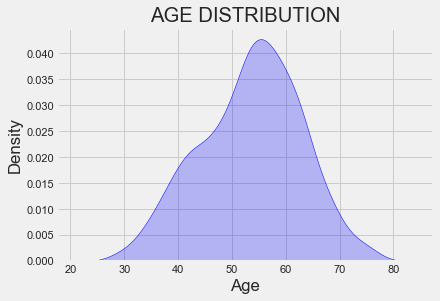

In [8]:
#Age Distribution
sns.kdeplot(Heart_D['Age'], shade=True, color="blue").set_title('AGE DISTRIBUTION')

M    725
F    193
Name: Sex, dtype: int64


Text(0.5, 1.0, 'SEX DISTRIBUTION')

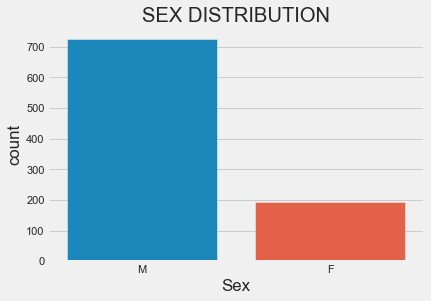

In [9]:
#Sex distribution
print(Heart_D.Sex.value_counts())
sns.countplot(Heart_D['Sex']).set_title('SEX DISTRIBUTION')

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64


Text(0.5, 1.0, 'Chest Pain Type DISTRIBUTION')

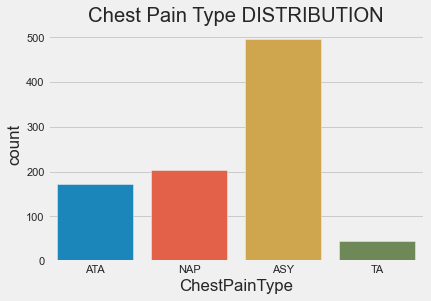

In [10]:
#Chest pain type distribution
print(Heart_D.ChestPainType.value_counts())
sns.countplot(Heart_D['ChestPainType']).set_title('Chest Pain Type DISTRIBUTION')

Text(0.5, 1.0, 'BP distribution')

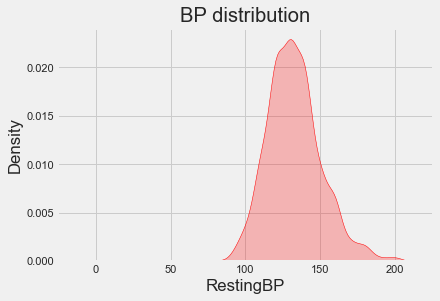

In [11]:
# BP distribution 
sns.kdeplot(Heart_D['RestingBP'], shade=True, color="red").set_title('BP distribution')

Text(0.5, 1.0, 'Fasting Blood sugar distribution')

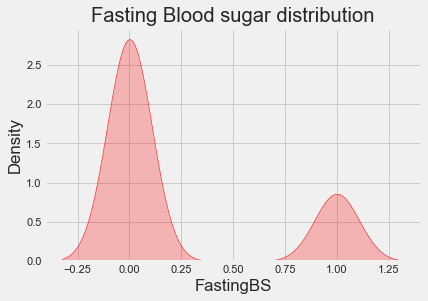

In [12]:
# Fasting Blood sugar distribution 
sns.kdeplot(Heart_D['FastingBS'], shade=True, color="red").set_title('Fasting Blood sugar distribution')

Text(0.5, 1.0, 'CHOLESTEROL DISTRIBUTION')

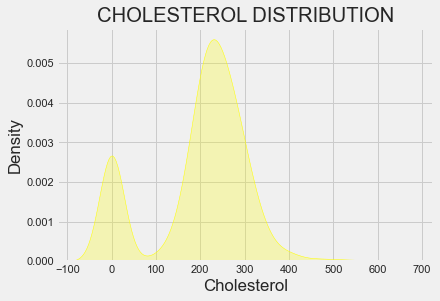

In [13]:
#Cholesterol Distribution
sns.kdeplot(Heart_D['Cholesterol'], shade=True, color="yellow").set_title('CHOLESTEROL DISTRIBUTION')

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64


Text(0.5, 1.0, 'Resting electrocardiogram DISTRIBUTION')

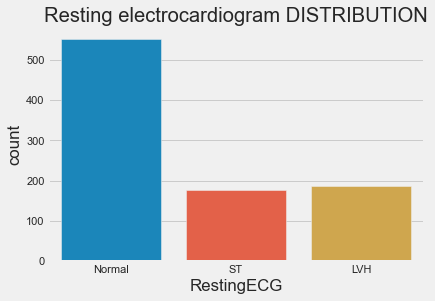

In [14]:
#Resting electrocardiogram distribution
print(Heart_D.RestingECG.value_counts())
sns.countplot(Heart_D['RestingECG']).set_title('Resting electrocardiogram DISTRIBUTION')

Text(0.5, 1.0, 'MaxHR DISTRIBUTION')

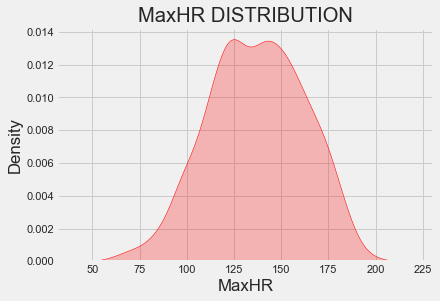

In [15]:
# maximum heart rate achieved distribution
sns.kdeplot(Heart_D['MaxHR'], shade=True, color="red").set_title('MaxHR DISTRIBUTION')

N    547
Y    371
Name: ExerciseAngina, dtype: int64


Text(0.5, 1.0, 'exercise-induced angina DISTRIBUTION')

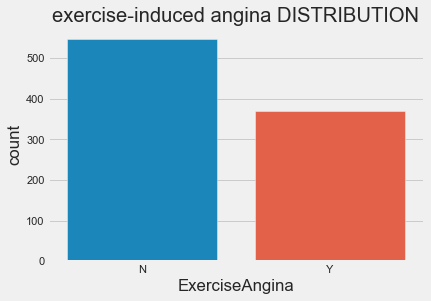

In [16]:
#  exercise-induced angina distribution
print(Heart_D.ExerciseAngina.value_counts())
sns.countplot(Heart_D['ExerciseAngina']).set_title('exercise-induced angina DISTRIBUTION')

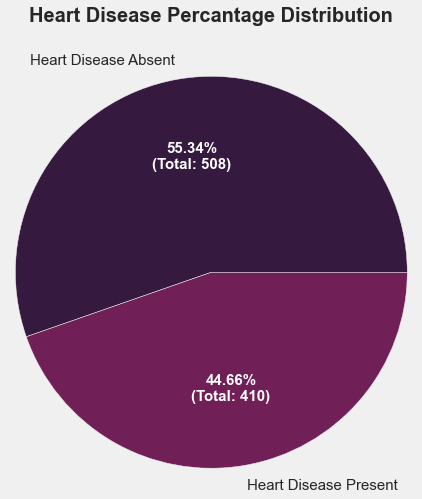

In [17]:
Heart_D_counts = Heart_D['HeartDisease'].value_counts()

fig, ax = plt.subplots(figsize =(10, 7))
_, _, autotexts = ax.pie(x=Heart_D_counts, labels=['Heart Disease Absent', 'Heart Disease Present'], radius=1.2,
                         autopct=lambda p: '{:.2f}%\n(Total: {:.0f})'.format(p,(p/100)*len(Heart_D)),
                         colors=sns.color_palette("rocket"), textprops=dict(fontsize=15))

ax.set_title('Heart Disease Percantage Distribution', y=1.1, weight='bold', fontsize=20)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

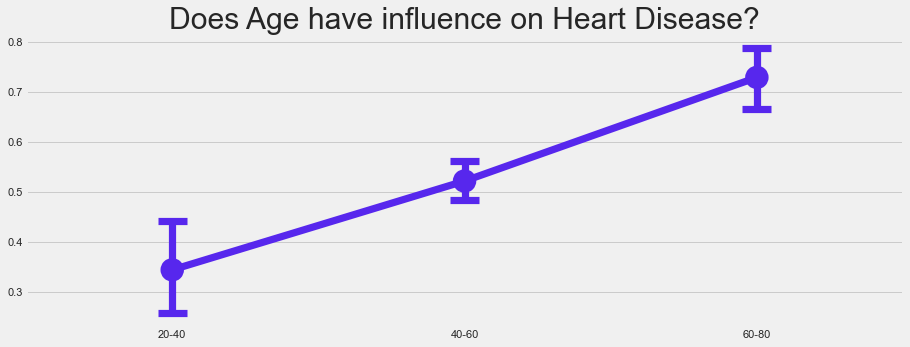

In [18]:
def plot_age(Heart_D, column_name):

    age_data = Heart_D[[column_name, 'HeartDisease']]
    age_data[column_name] = pd.cut(age_data[column_name],
                               bins=[20, 40, 60, 80],
                               labels=['20-40',
                                       '40-60',
                                       '60-80',])

    
    plt.figure(figsize=(14, 5))
    plot = sns.pointplot(x=column_name, y='HeartDisease',
                  dodge=0.1, capsize=.1, data=age_data, color="#5727ed")
    plot.set_title(f'Does {column_name} have influence on Heart Disease?', fontsize=30)
    plot.set(xlabel=None, ylabel=None)


plot_age(Heart_D, 'Age')

From the chart above, the higher your age, the higher the probability of you having heart disease

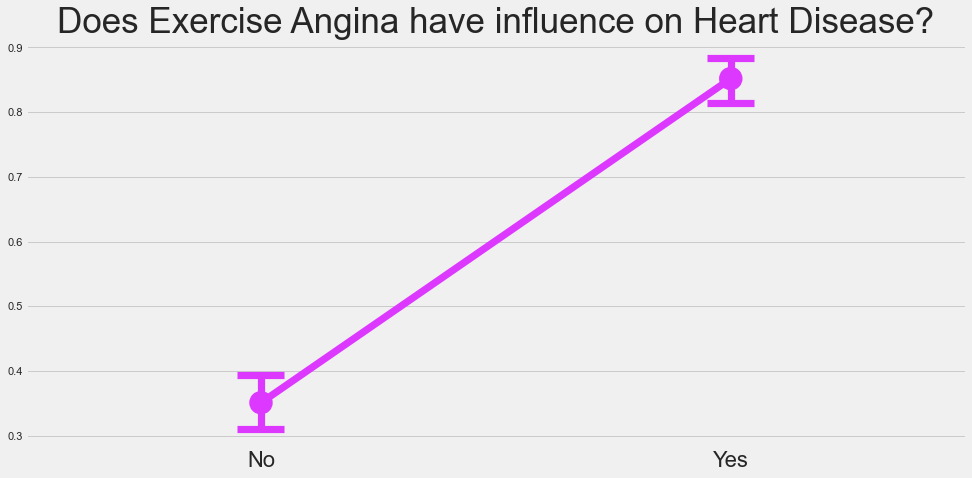

In [19]:
def plot_ExerAng(Heart_D, column_name):

    ExerciseAng_data = Heart_D[[column_name, 'HeartDisease']]

    
    plt.figure(figsize=(15, 7))
    ExerciseAng = sns.pointplot(x=column_name, y='HeartDisease',
                           dodge=0.1, capsize=.1,
                           data=ExerciseAng_data,
                           color='#dd38ff')
    ExerciseAng.set_title('Does Exercise Angina have influence on Heart Disease?',
                            fontsize=35)
    ExerciseAng.set(xlabel=None, ylabel=None)
    ExerciseAng.set_xticklabels(['No', 'Yes'], size=22)


plot_ExerAng(Heart_D, 'ExerciseAngina')

[Text(0, 0, 'ATA'), Text(1, 0, 'NAP'), Text(2, 0, 'ASY'), Text(3, 0, 'TA')]

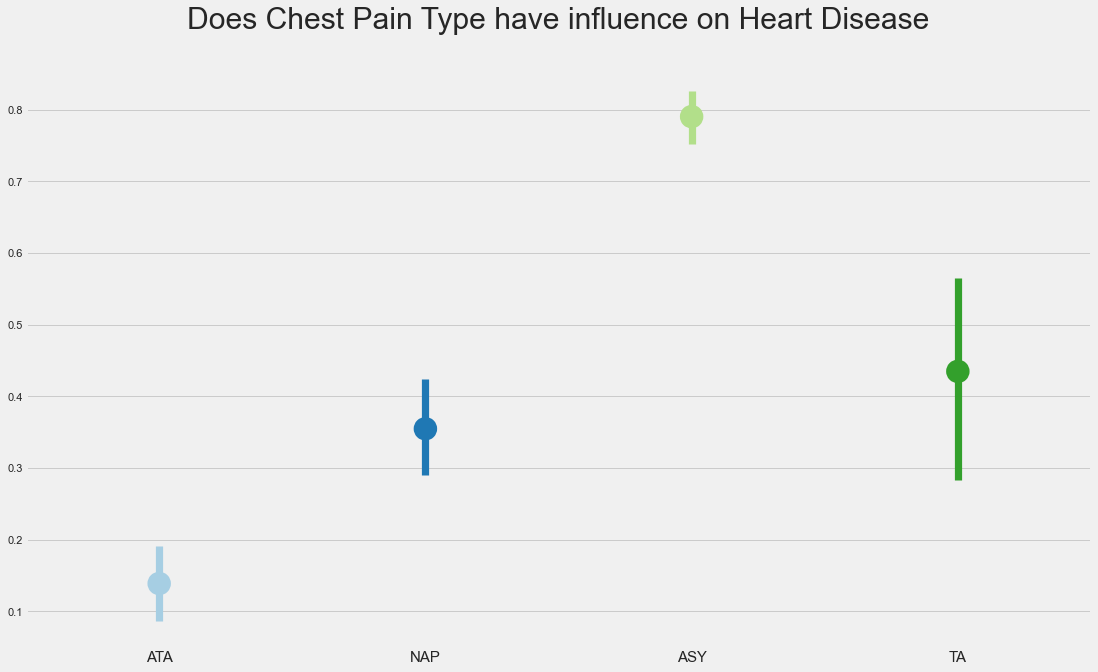

In [20]:
fig = plt.figure(figsize=(17, 10))

ax = fig.add_subplot(111)
chest_cat = sns.pointplot(x=Heart_D.ChestPainType, y='HeartDisease', data=Heart_D,
             ax=ax, palette='Paired')
chest_cat.set_title('Does Chest Pain Type have influence on Heart Disease',
                    fontsize=30, y=1.05)
chest_cat.set(xlabel=None,
                   ylabel=None)
chest_cat.set_xticklabels(chest_cat.get_xticklabels(),size=15)


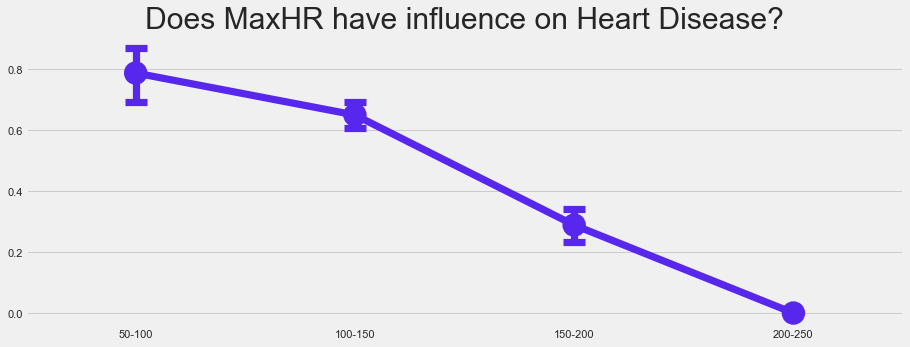

In [21]:
def plot_mhr(Heart_D, column_name):

    MHR_data = Heart_D[[column_name, 'HeartDisease']]
    MHR_data[column_name] = pd.cut(MHR_data[column_name],
                               bins=[50, 100, 150, 200, 250],
                               labels=['50-100',
                                       '100-150',
                                       '150-200',
                                      '200-250',])

    
    plt.figure(figsize=(14, 5))
    plot = sns.pointplot(x=column_name, y='HeartDisease',
                  dodge=0.1, capsize=.1, data=MHR_data, color="#5727ed")
    plot.set_title(f'Does {column_name} have influence on Heart Disease?', fontsize=30)
    plot.set(xlabel=None, ylabel=None)


plot_mhr(Heart_D, 'MaxHR')

<Figure size 1080x1080 with 0 Axes>

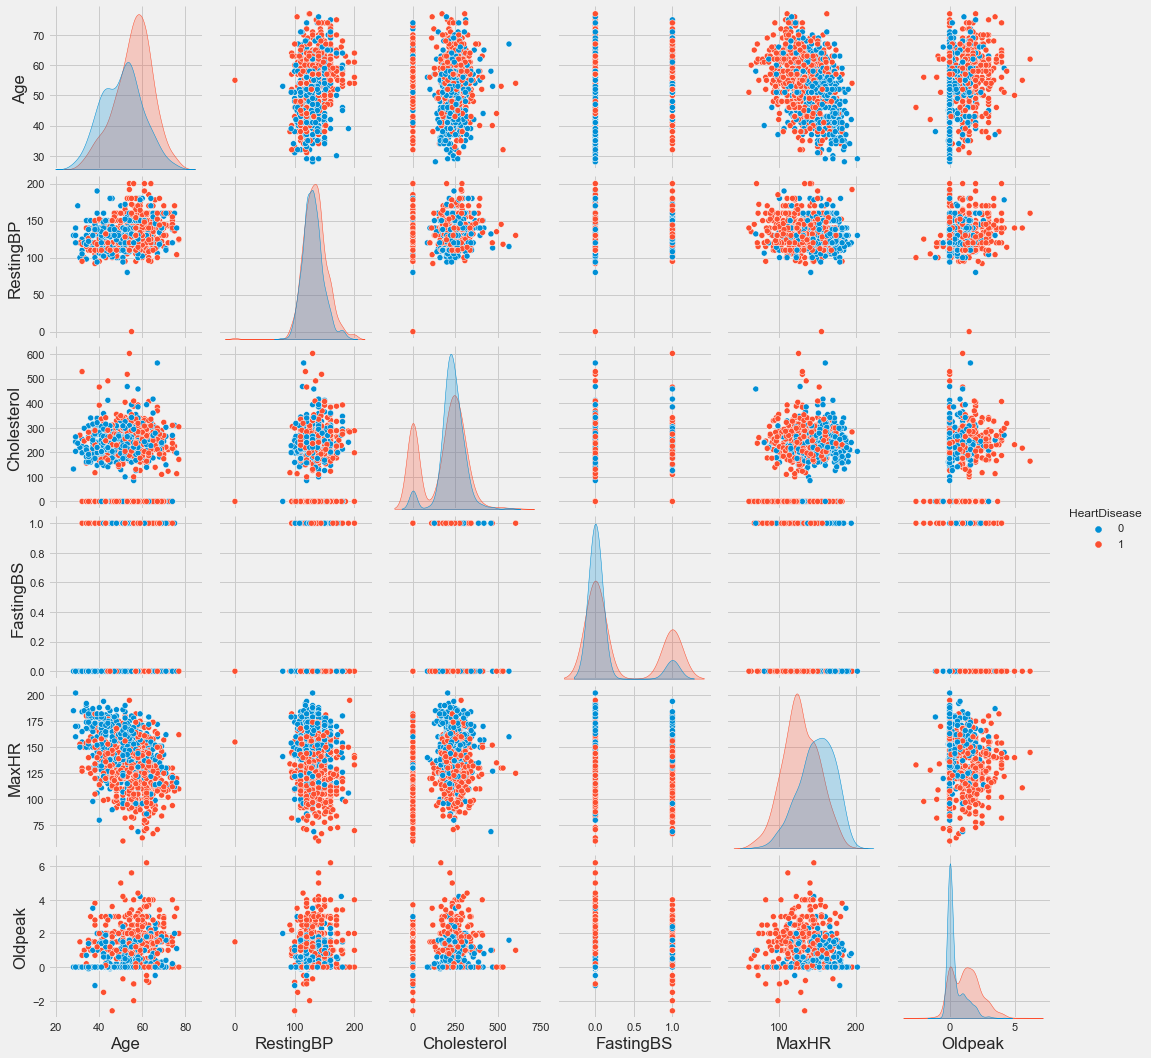

In [22]:
# Pair plot
fig = plt.figure(figsize=(15,15))
sns.pairplot(Heart_D, hue="HeartDisease")
plt.show()

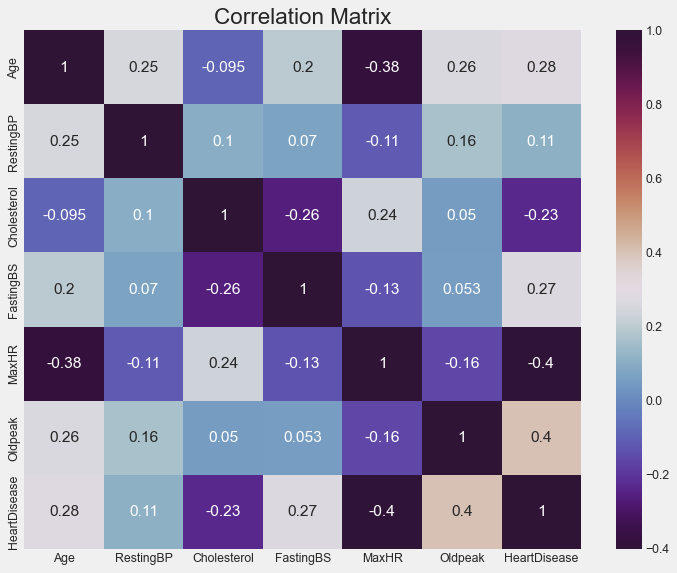

In [23]:
plt.figure(figsize=(10,8), dpi=80)
plotcorr=sns.heatmap(Heart_D.corr(),  annot=True, cmap='twilight_shifted')
plt.title('Correlation Matrix') 
plt.show()

In [24]:
# pp.ProfileReport(Heart_D, title= 'HEART DISEASE')

In [25]:
Heart_D.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

# Removing unwanted column

In [26]:
Heart_D = Heart_D.drop(["Sex",'ST_Slope', 'ExerciseAngina'],axis=1)

# scaling the Target column using Label Encoder

In [27]:
lc=LabelEncoder()
Heart_D["ChestPainType"]=lc.fit_transform(Heart_D["ChestPainType"])

In [28]:
lc=LabelEncoder()
Heart_D["RestingECG"]=lc.fit_transform(Heart_D["RestingECG"])

In [29]:
x= Heart_D.drop('HeartDisease', axis=1)
y=Heart_D['HeartDisease']

In [30]:
Heart_D.head()
Heart_D.RestingECG.unique()

array([1, 2, 0])

# Balancing of my data set

In [31]:
oversample = SMOTE()
x,y = oversample.fit_resample(x, y)

# Spliting Data into Training and Testing

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(711, 8)
(305, 8)
(711,)
(305,)


# I exploit the value_counts() function

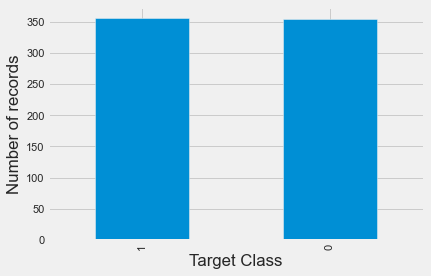

In [34]:
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

# Feature scaling

In [35]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# machine learning Algorithem and Model Training

Accuracy of KNN model is: 82.62
[[129  24]
 [ 29 123]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       153
           1       0.84      0.81      0.82       152

    accuracy                           0.83       305
   macro avg       0.83      0.83      0.83       305
weighted avg       0.83      0.83      0.83       305



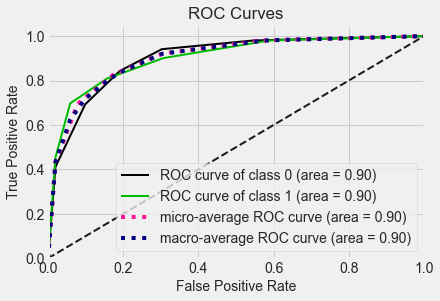

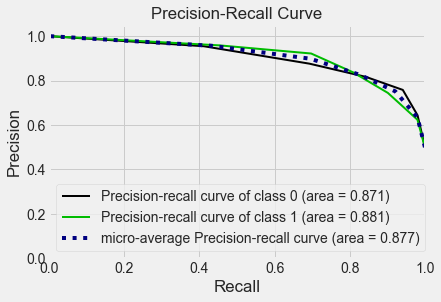

In [36]:
knn = KNeighborsClassifier()
knnmodel = knn.fit(x_train, y_train)
knnscore = knn.score(x_test, y_test)*100
knn_score = knn.predict_proba(x_test)
knn_pred = knn.predict(x_test)
print("Accuracy of KNN model is: %.2f"%knnscore)
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))


plot_roc(y_test, knn_score)
plt.show()
    
plot_precision_recall(y_test, knn_score)
plt.show()

# GradientBoostingClassifier

In [37]:
gbc = GradientBoostingClassifier()
gbcmodel = gbc.fit(x_train, y_train)
gbcscore = gbc.score(x_test, y_test)*100
gbc_pred = gbc.predict(x_test)
print("Accuracy of GBC model is: %.2f"%gbcscore)
print(confusion_matrix(y_test, gbc_pred))
print(classification_report(y_test, gbc_pred))

Accuracy of GBC model is: 83.61
[[132  21]
 [ 29 123]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       153
           1       0.85      0.81      0.83       152

    accuracy                           0.84       305
   macro avg       0.84      0.84      0.84       305
weighted avg       0.84      0.84      0.84       305



# Random Forest

In [38]:
RF = RandomForestClassifier()
RFmodel = RF.fit(x_train, y_train)
RFscore = RF.score(x_test, y_test)*100
RF_pred = RF.predict(x_test)
print("Accuracy of RF model is: %.3f"%RFscore)
print(confusion_matrix(y_test, RF_pred))
print(classification_report(y_test, RF_pred))

Accuracy of RF model is: 84.918
[[131  22]
 [ 24 128]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       153
           1       0.85      0.84      0.85       152

    accuracy                           0.85       305
   macro avg       0.85      0.85      0.85       305
weighted avg       0.85      0.85      0.85       305



# XGB

In [39]:
xgb = XGBClassifier()
xgbmodel = xgb.fit(x_train, y_train)
xgbscore = xgb.score(x_test, y_test)*100
xgb_pred = xgb.predict(x_test)
print("Accuracy of XGB model is: %.2f"%xgbscore)
print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

[21:56:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGB model is: 81.64
[[123  30]
 [ 26 126]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       153
           1       0.81      0.83      0.82       152

    accuracy                           0.82       305
   macro avg       0.82      0.82      0.82       305
weighted avg       0.82      0.82      0.82       305



# MLP

In [52]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100, 50), random_state=1)

mlpmodel = clf.fit(x_train, y_train)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5000, 1000), random_state=1,
              solver='lbfgs')
mlpscore = clf.score(x_test, y_test)*100
mlp_pred = clf.predict(x_test)
print("Accuracy of MLP model is: %.2f"%clfscore)
print(confusion_matrix(y_test, mlp_pred))
print(classification_report(y_test, mlp_pred))

Accuracy of MLP model is: 77.38
[[126  27]
 [ 42 110]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.79       153
           1       0.80      0.72      0.76       152

    accuracy                           0.77       305
   macro avg       0.78      0.77      0.77       305
weighted avg       0.78      0.77      0.77       305



In [62]:
ann = Sequential()
ann.add(Dense(12, input_dim=8, activation='relu'))
ann.add(Dense(8, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))
# Compile model
ann_com = ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
annmodel = ann.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=150, batch_size=10)

Epoch 1/150
72/72 [==============================] - 2s 10ms/step - loss: 0.6358 - accuracy: 0.6188 - val_loss: 0.5977 - val_accuracy: 0.7443
Epoch 2/150
72/72 [==============================] - 0s 5ms/step - loss: 0.5650 - accuracy: 0.7581 - val_loss: 0.5267 - val_accuracy: 0.7770
Epoch 3/150
72/72 [==============================] - 0s 5ms/step - loss: 0.5106 - accuracy: 0.7722 - val_loss: 0.4784 - val_accuracy: 0.8000
Epoch 4/150
72/72 [==============================] - 0s 5ms/step - loss: 0.4770 - accuracy: 0.7820 - val_loss: 0.4528 - val_accuracy: 0.8066
Epoch 5/150
72/72 [==============================] - 0s 5ms/step - loss: 0.4608 - accuracy: 0.7876 - val_loss: 0.4369 - val_accuracy: 0.8164
Epoch 6/150
72/72 [==============================] - 0s 4ms/step - loss: 0.4514 - accuracy: 0.7932 - val_loss: 0.4298 - val_accuracy: 0.8131
Epoch 7/150
72/72 [==============================] - 0s 5ms/step - loss: 0.4453 - accuracy: 0.7961 - val_loss: 0.4272 - val_accuracy: 0.8131
Epoch 8/150


In [57]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

10/10 [==============================] - 0s 6ms/step


In [67]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
annscore = accuracy_score(y_test,y_pred)
annscore

[[127  26]
 [ 27 125]]


0.8262295081967214

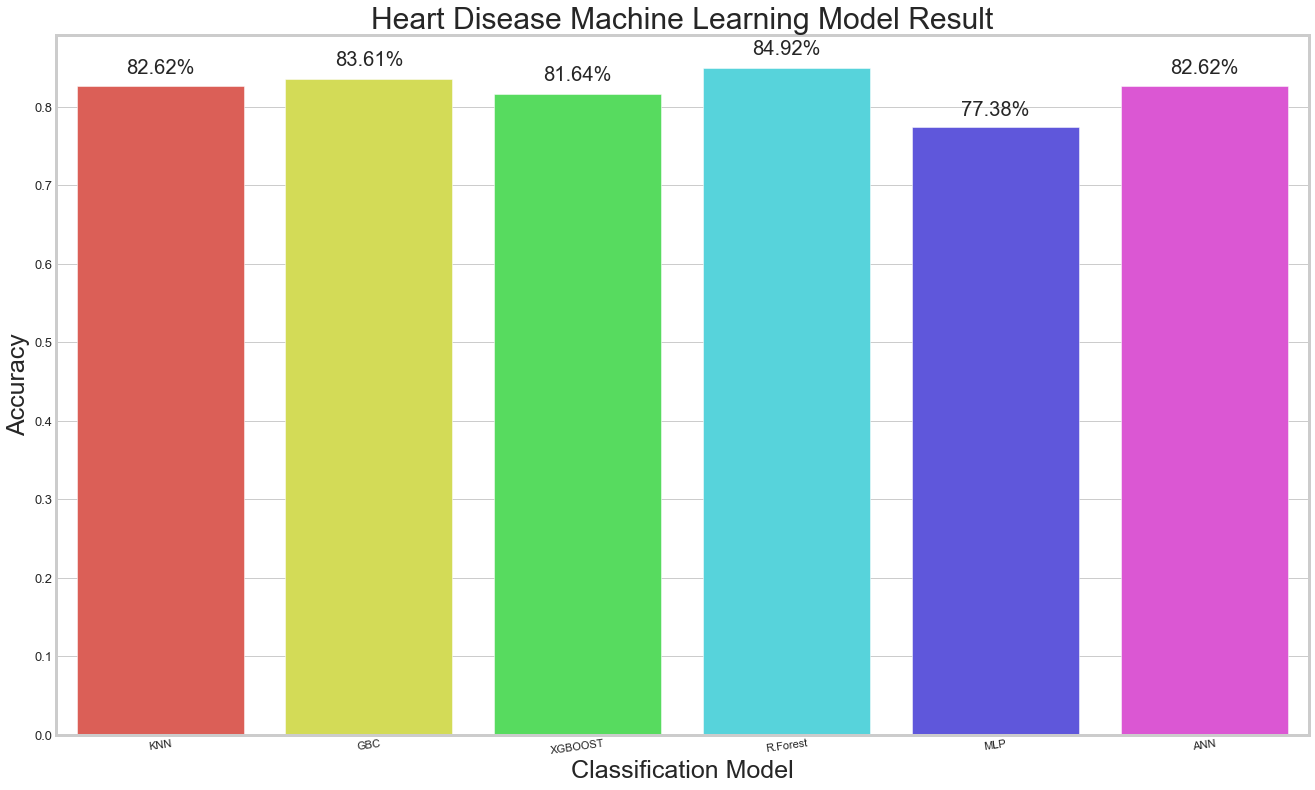

In [61]:
viz =[]
viz2 = []
viz.append(knnscore/100)
viz2.append('KNN')
viz.append(gbcscore/100)
viz2.append("GBC")
viz.append(xgbscore/100)
viz2.append('XGBOOST')
viz.append(RFscore/100)
viz2.append('R.Forest')
viz.append(RFscore/100)
viz2.append('R.Forest')
viz.append(mlpscore/100)
viz2.append('MLP')
viz.append(annscore/100)
viz2.append('ANN')
plt.rcParams['figure.figsize'] = 10,8
sns.set_style('whitegrid')
plt.figure(figsize=(20,12))
ax = sns.barplot(x=viz2, y=viz, palette= 'hls', saturation=1.5)
plt.xlabel('Classification Model', fontsize=25)
plt.ylabel('Accuracy', fontsize=25)
plt.title('Heart Disease Machine Learning Model Result',fontsize=30 )
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()